#                                      Employee Turnover Analytics

# As the novice ML Developer I have to do the following:
####   • Perform data quality check by checking for missing values if any.
####  • Understand what factors contributed most to employee turnover by EDA.
####  • Perform clustering of Employees who left based on their satisfaction and evaluation.
####   • Handle the left Class Imbalance using SMOTE technique.
####   • Perform k-fold cross-validation model training and evaluate performance.
####   • Identify the best model and justify the evaluation metrics used.
####   • Suggest various retention strategies for targeted employees.

# Import and read the data

In [4]:
# import the libraries i need to
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# read the file and display the data
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# for more details of this data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# The steps:
## 1.Perform data quality check by checking for missing values if any.


In [7]:
# check for NULL value
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

__Observation :__

- There is no missing value

In [8]:
# Clean the duplicated
df=df.drop_duplicates()
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


__Observation :__

- There is 3008 row duplicated

## 2.Understand what factors contributed most to employee turnover by EDA.
### 2.1.Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

- All columns that contain numeric data are: (satisfaction_level	,last_evaluation, number_project ,	average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years

- I will put it in a heatmap showing the correlation matrix

<AxesSubplot:>

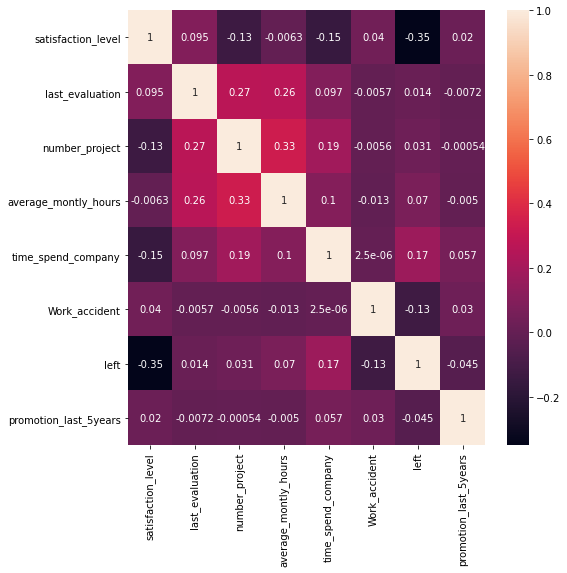

In [9]:
# Heatmap and correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

__Observation :__

- -0.35 for two columns satisfaction_level and left

- It shows that the lower the number of employees’ dissatisfaction, the higher the rate of their leaving the organization.

### 2.2.Draw the distribution plot of
#### ■ Employee Satisfaction (use column satisfaction_level)
#### ■ Employee Evaluation (use column last_evaluation)
#### ■ Employee Average Monthly Hours (use column average_montly_hours)


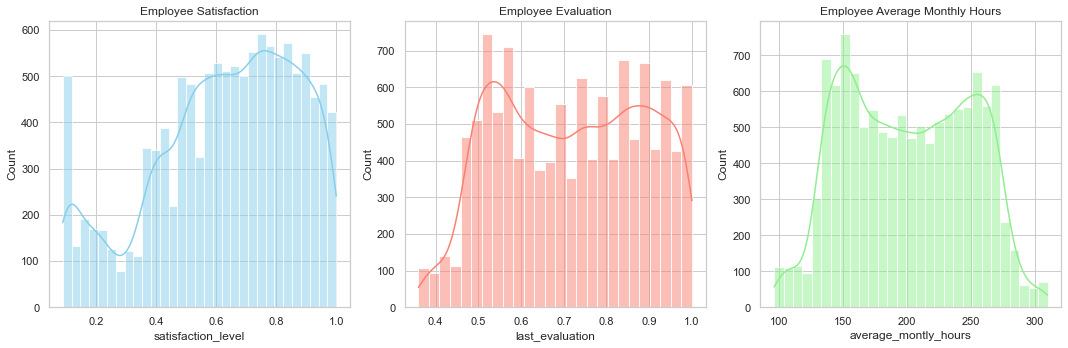

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Create subplots for each distribution
# Plot 1: Employee Satisfaction
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='satisfaction_level', kde=True, color='skyblue')
plt.title("Employee Satisfaction")

# Plot 2: Employee Evaluation
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='last_evaluation', kde=True, color='salmon')
plt.title("Employee Evaluation")

# Plot 3: Employee Average Monthly Hours
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='average_montly_hours', kde=True, color='lightgreen')
plt.title("Employee Average Monthly Hours")

plt.tight_layout()

__Observation:__

- Each graph shows increasing and decreasing the values

### 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.


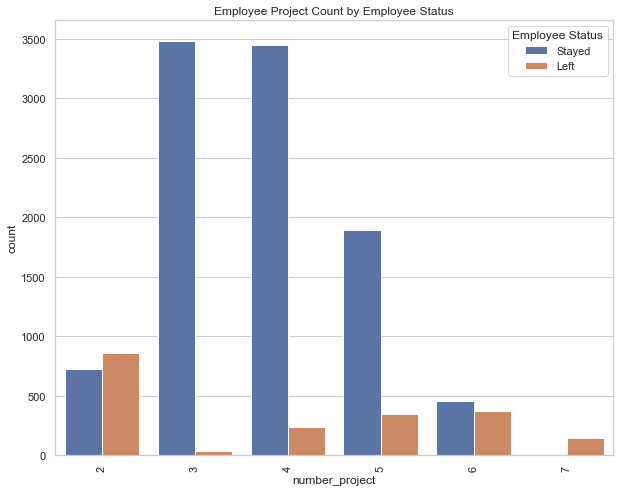

In [11]:
# Set the style for the plots
plt.figure(figsize=(10, 8))

# Plot for two columns
sns.countplot(x="number_project",hue="left",data=df)

plt.xticks(rotation=90)
plt.title("Employee Project Count by Employee Status")
plt.legend(title="Employee Status", labels=["Stayed", "Left"])

__Observation:__

- In Project 2, it’s shown that the employees who left the organization more

- In Project 3,4,5,6 , it’s shown that the employees who stayed the organization more

- In Project 7, it shows only the employees who have left the organization

## 3.Perform clustering of Employees who left based on their satisfaction and evaluation.
### 3.1.Choose columns satisfaction_level, last_evaluation and left.
### 3.2.Do KMeans clustering of employees who left the company into 3 clusters.
### 3.3.Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.



In [12]:
# Import KMeans Model
from sklearn.cluster import KMeans

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\acer\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


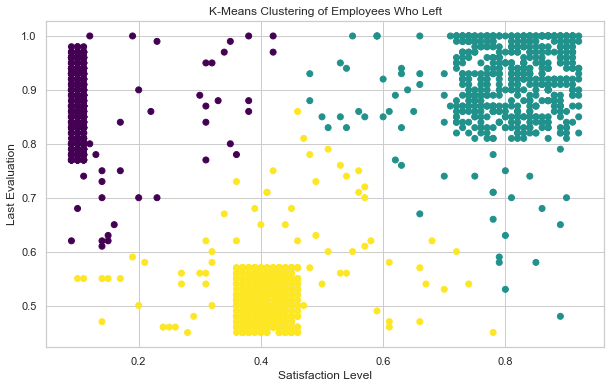

In [13]:
# Select the relevant columns
emp = df[['satisfaction_level', 'last_evaluation', 'left']]

# Filter employees who left the company (left=1)
left_emp = emp[emp['left'] == 1]

# Drop the 'left' column since it's not needed for clustering
left_emp = left_emp.drop('left', axis=1)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
left_emp['cluster'] = kmeans.fit_predict(left_emp)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

__Observation:__

- Cluster 1 : Yellow

Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

- Cluster 2 : Green

Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

- Cluster 3 : Purble

Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.


### 4.	Handle the left Class Imbalance using SMOTE technique.
#### 4.1.	Pre-Process the data by converting categorical columns to numerical columns by:
■	Separating categorical variables and numeric variables.

■	Applying get_dummies() to the categorical variables.

■	Combining categorical variables and numeric variables.
#### 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
#### 4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [9]:
# Check what the columns that have numeric or categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


__Observation:__

- 8 columns (numeric) AND
2 columns (categorical)

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Separate categorical and numeric variables
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Combine categorical and numeric variables
X = df_encoded.drop('left', axis=1)
y = df['left']

# Standardize the data if needed
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


- The output after combine

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9592, 20), (9592,), (2399, 20), (2399,))

In [14]:
y_train.value_counts()

left
0    7999
1    1593
Name: count, dtype: int64

- 7999 is the number of employee who didn't leave and 1593  is the number of employee who left

In [15]:
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [16]:
y_train_resampled.value_counts()

left
0    7999
1    7999
Name: count, dtype: int64

- You can see that all of this have 7999 rows now.

# The linear regression :


C:\Users\beaut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\beaut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\beaut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.69      0.69      0.69      7999
         1.0       0.69      0.69      0.69      7999
         2.0       0.00      0.00      0.00         0

    accuracy                           0.69     15998
   macro avg       0.35      0.35      0.35     15998
weighted avg       0.69      0.69      0.69     15998


 cross-validation Accuracy: -0.36

Training Accuracy: 0.33


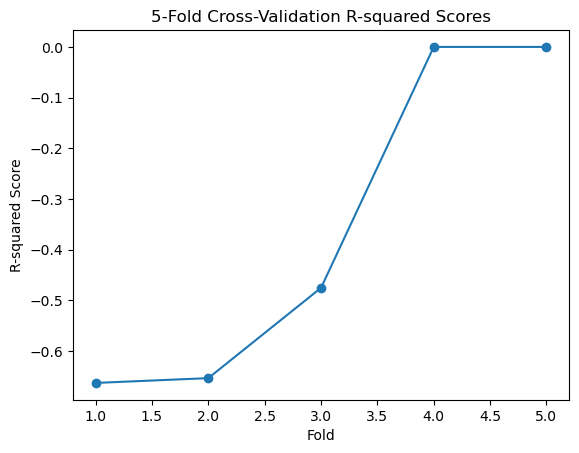

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train_resampled, y_train_resampled)

# Perform 5-Fold cross-validation and get predictions
predictions = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=5)

# Calculate the R-squared score for each fold
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)


# Plot the classification report
print(classification_report(y_train_resampled, predictions.round()))


# Report performance
print('\n cross-validation Accuracy: %.2f' % np.mean(scores))

# Get the accuracy score on the training set
train_accuracy = model.score(X_train_resampled, y_train_resampled)
print('\nTraining Accuracy: %.2f' % train_accuracy)

# Plot the R-squared scores for each fold
plt.plot(np.arange(1, 6), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('R-squared Score')
plt.title('5-Fold Cross-Validation R-squared Scores')
plt.show()

In [20]:
model.score(X_train_resampled,y_train_resampled)

0.3264562545635947

### observation:
- The accuracy of the model in the cross-validation process is <b> -0.36</b>
- The accuracy of the model in Linear Regression model is <b> 0.32</b>

### The next step:🎯

- We're going to perform three models to expect higher accuracy than 0.326 accuracy 

# 5.1 Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report



### Steps:
- 1 split the data(train/test)
- 2 set a logistic regression 
- 3 set cross validation =  5 
- 4 Check the accuracy

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Assuming your data preprocessing code to get X_train_resampled, y_train_resampled, X, and y

lr_model = LogisticRegression(random_state=0, penalty='l2', C=1, fit_intercept=True)
lr_model.fit(X_train_resampled, y_train_resampled)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Ensure that the data you use for cross-validation matches the number of samples in your training data.
ypred1 = cross_val_predict(lr_model, X_train_resampled, y_train_resampled, cv=5)

scores1 = cross_val_score(lr_model, X, y, scoring='accuracy', cv=5)

# Generate classification report
print('Classification Report:')
print(classification_report(y_train_resampled, ypred1))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      7999
           1       0.78      0.85      0.81      7999

    accuracy                           0.81     15998
   macro avg       0.81      0.81      0.80     15998
weighted avg       0.81      0.81      0.80     15998



In [23]:
# Get the accuracy score on the training set
train_accuracy= lr_model.score(X_train_resampled,y_train_resampled)
print('\nTraining Accuracy: %.2f' % train_accuracy)

print('\ncross-validation Accuracy:y test %.2f' % np.mean(scores1))



Training Accuracy: 0.81

cross-validation Accuracy:y test 0.82


### observation:
- cross-validation Accuracy:y test 0.97 is higher score 
- The Training accuracy of logistic Regression <b>0.81</b>. 
- it shows that the <u><b>logistic Regression</b></u>< shows a <u>higher accuracy</u> than linear regression rising about 50%  

In [24]:
print(lr_model.score(X_test,y_test))

0.7740725302209254


### observation:
- Testing in X_test, y_test scor are different result without resampling 

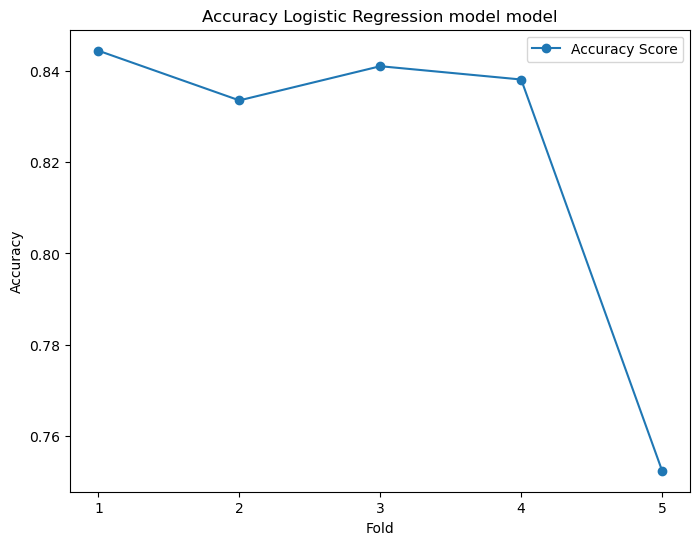

In [25]:
import matplotlib.pyplot as plt

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), scores1, marker='o', label='Accuracy Score')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Logistic Regression model model')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


### Plot observation:
- An example of how accuracy varies across folds of the cross-validation model can be seen in this plot.
- As we see in this plot, the fold 1,2,3,4 are approximate. But in in 5th fold is dropping down obviously which considered has the lowest accuracy


# 5.2.Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.


### Steps:
- 1 split the data(train/test)
- 2 Train a Random Forest Classifier model
- 3 set cross validation =  5 
- 4 Check the accuracy
- 5 classification Report

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10, random_state=4)
clf.fit(X_train_resampled,y_train_resampled)

# Perform cross-validation
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)

# Print cross-validation scores
print('Cross-Validation Scores:', np.mean(scores))

# Create a KFold object
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

# Perform cross-validation using KFold
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=kfold)

# Print cross-validation scores using KFold
print('Cross-Validation Scores (KFold):', np.mean(cv_scores))

# Make predictions on the test set
y_pred2 = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred2)
print('\n')
# Print accuracy score
print('Accuracy Score:', accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred2)

# Print classification report
print('Classification Report:')
print(classification_rep)

Cross-Validation Scores: 0.9673716005001565
Cross-Validation Scores (KFold): 0.9691211902156924


Accuracy Score: 0.9745727386411005
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.94      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [27]:
clf.score(X_train_resampled,y_train_resampled)

0.9739342417802225

### Steps:
- 1 split the data(train/test)
- 2 Train a Random Forest Classifier model
- 3 set cross validation =  5 
- 4 Check the accuracy
- 5 classification Report

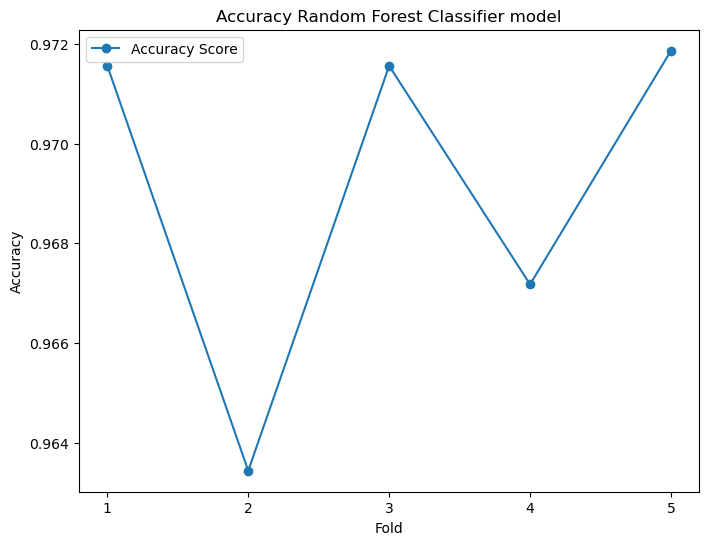

In [28]:
import matplotlib.pyplot as plt

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', label='Accuracy Score')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Random Forest Classifier model')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


### Plot observation:
- An example of how accuracy varies across folds of the cross-validation model can be seen in this plot.
- As we see in this plot, the folded drawing is like a zig-zag, fold(2) has a lowest accuray in 2 and followed fold(4) 
- fold(3) and (1) is approximate accuray. fold(5) has a highest accuracy

# 5.3.Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

### Steps:
- 1 split the data(train/test)
- 2 Train a Gradient Boosting Classifier model
- 3 set cross validation =  5 
- 4 Check the accuracy
- 5 classification Report

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [31]:
# Create a Gradient Boosting Classifier
gboost_classifier = GradientBoostingClassifier(random_state=123)

# Fit the model on the resampled training data
gboost_classifier.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)

# Print cross-validation scores
print('Cross-Validation Scores:', np.mean(scores))

# Create a KFold object
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

# Perform cross-validation using KFold
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=kfold)

# Print cross-validation scores using KFold
print('Cross-Validation Scores (KFold):', np.mean(cv_scores))


Cross-Validation Scores: 0.9673716005001565
Cross-Validation Scores (KFold): 0.9691211902156924


In [32]:
y_pred3 = gboost_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred3)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9695706544393498
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.91      0.91      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



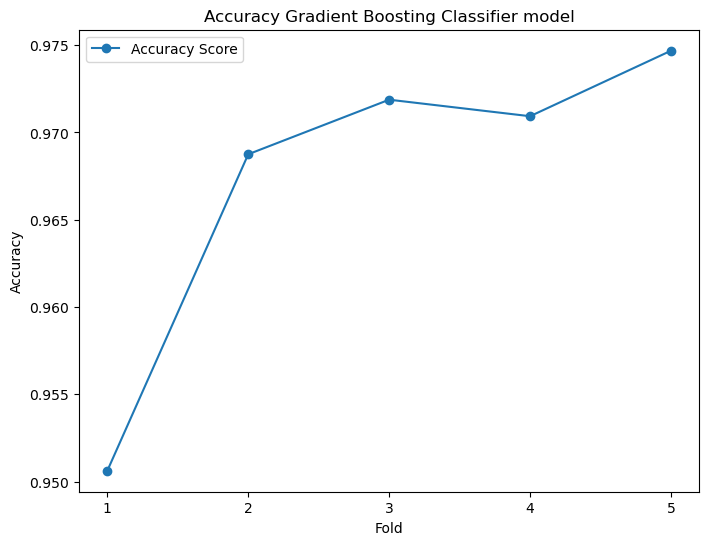

In [33]:
import matplotlib.pyplot as plt

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), scores, marker='o', label='Accuracy Score')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Gradient Boosting Classifier model')
plt.xticks(range(1, 6))
plt.legend()
plt.show()


### Plot observation:
- An example of how accuracy varies across folds of the cross-validation model can be seen in this plot.
- As we see in this plot, it is gradually increasing starting from 1 to 5. which 5 has a good accuracy

### 6.	Identify the best model and justify the evaluation metrics used.
#### 6.1.Find the ROC/AUC for each model and plot the ROC curve.


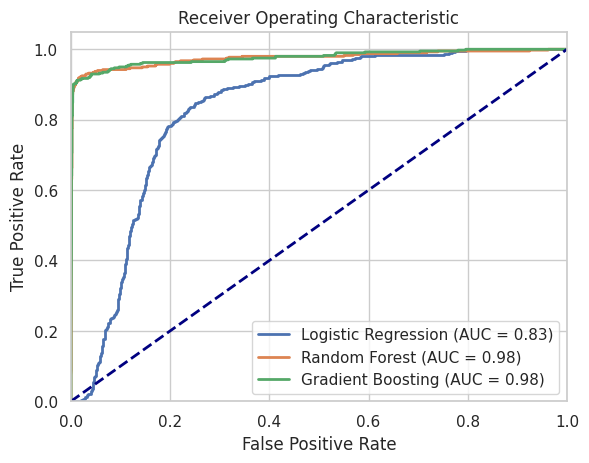

In [264]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure()

# Model 1: Logistic Regression
y_pred_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = %0.2f)' % auc_lr)

# Model 2: Random Forest Classifier

y_pred_rf = clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = %0.2f)' % auc_rf)

# Model 3: Gradient Boosting Classifier
y_pred_gb = gboost_classifier.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_pred_gb)
plt.plot(fpr_gb, tpr_gb, lw=2, label=f'Gradient Boosting (AUC = %0.2f)' % auc_gb)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

__Observation:__

- Random Forest and Gradient Boosting outperform Logistic Regression in ROC/AUC with AUC=0.98.
- Both Random Forest and Gradient Boosting exhibit high AUC values.

#### 6.2.Find the confusion matrix for each of the models.

#### 6.3.From the confusion matrix, explain which metric needs to be used- Recall or Precision?

##### Confusion matrix of Logistic Regression

In [265]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, ypred1)
print("Confusion Matrix:")
print(cm1)

Confusion Matrix:
[[1529  472]
 [  70  328]]


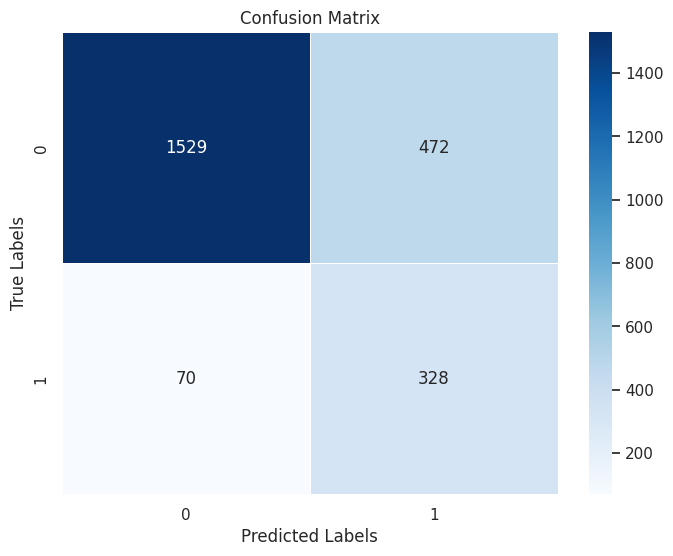

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


__Observation:__

- Logistic Regression model has a relatively high number of false positives (472) compared to true positives (328). It means that a significant number of negative instances are being classified as positive. In this case, the focus should be on improving precision to reduce the false positives. So, precision is more critical.

##### Confusion matrix of Random Forest

In [267]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[1977   24]
 [  37  361]]


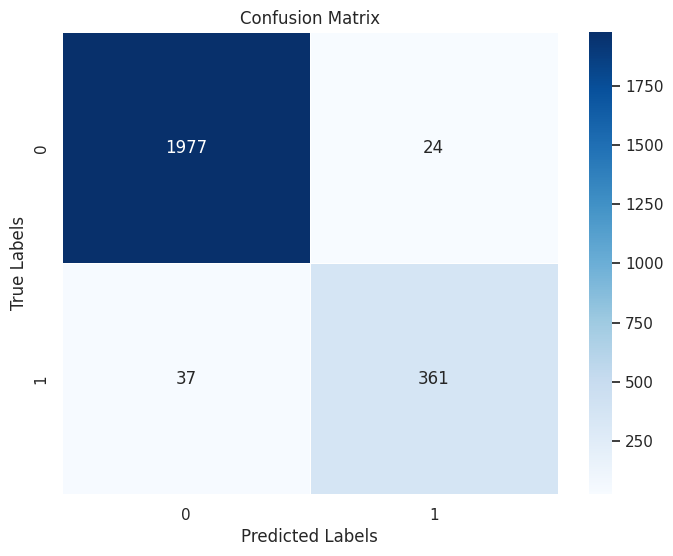

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

__Observation:__

- Random Forest model has very few false positives (24) compared to true positives (361). It indicates strong precision. However, the number of false negatives (37) is not negligible, so there's room for improvement in recall.also,balance both precision and recall.


#### Confusion matrix of Gradient Boosting

In [269]:
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm3)

Confusion Matrix:
[[1963   38]
 [  35  363]]


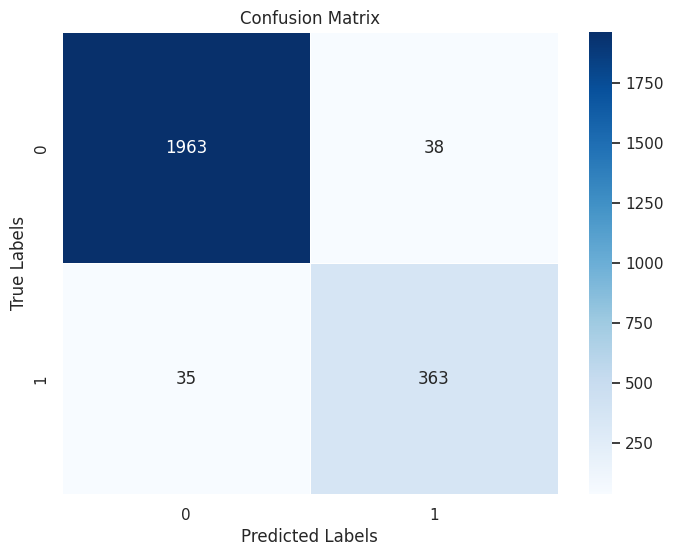

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


__Observation:__

- Similar to the Random Forest model, the Gradient Boosting model has a low number of false positives and some false negatives. balance both precision and recall.

### 7.	Suggest various retention strategies for targeted employees.
#### 7.1.Using the best model, predict the probability of employee turnover in the test data.


In [271]:
test_predictions = pd.DataFrame(data=scores)
test_predictions

,0
0,0.950625
1,0.968750
2,0.971875
3,0.970928
4,0.974680


In [272]:
test_predictions.rename(columns={0:'predictions'},inplace=True)
test_predictions.head()

,predictions
0,0.950625
1,0.968750
2,0.971875
3,0.970928
4,0.974680


In [273]:
prob = cross_val_predict(clf, X_test, y_test, cv=5, method='predict_proba')
# keep probabilities for the positive outcome only
prob = prob[:, 1]
prob

array([0.18960285, 0.22584049, 0.02198807, ..., 0.00536467, 0.02053708,
       0.25151906])

In [274]:
probability = pd.DataFrame(data=prob)
probability.head()

,0
0,0.189603
1,0.225840
2,0.021988
3,0.835023
4,0.063547


In [275]:
probability.rename(columns={0:'probability'},inplace=True)
probability.head()

,probability
0,0.189603
1,0.225840
2,0.021988
3,0.835023
4,0.063547


#### 7.2.Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
##### ■	Safe Zone (Green) (Score < 20%)
##### ■	Low Risk Zone (Yellow) (20% < Score < 60%)
##### ■	Medium Risk Zone (Orange) (60% < Score < 90%)
##### ■	High Risk Zone (Red) (Score > 90%).

In [276]:
len(probability)
# create a list of our conditions
conditions = [
    (probability['probability'] <= 0.2),
    (probability['probability'] > 0.2) & (probability['probability'] <= 0.6),
    (probability['probability'] > 0.6) & (probability['probability'] <= 0.9),
    (probability['probability'] > 0.9)
    ]

# create a list of the values we want to assign for each condition
values = ['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 'Medium Risk Zone (Orange)', 'High Risk Zone (Red)']

# create a new column and use np.select to assign values to it using our lists as arguments
probability['zone'] = np.select(conditions, values)

# display updated DataFrame
probability.head()

,probability,zone
0,0.189603,Safe Zone (Green)
1,0.225840,Low Risk Zone (Yellow)
2,0.021988,Safe Zone (Green)
3,0.835023,Medium Risk Zone (Orange)
4,0.063547,Safe Zone (Green)


In [277]:
print(X_test.shape)
print(test_predictions.shape)

print(probability.shape)

(2399, 20)
(5, 1)
(2399, 2)


<Axes: xlabel='number_project', ylabel='count'>

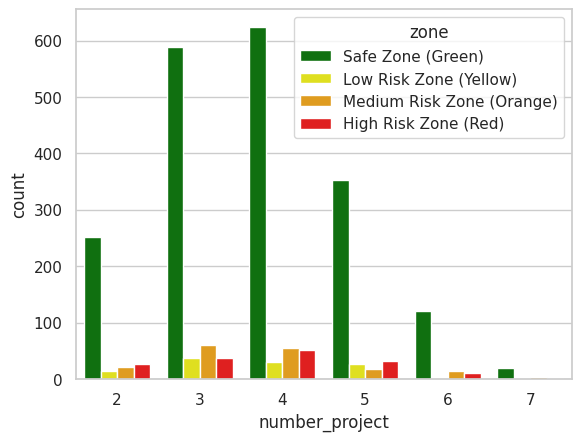

In [278]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df_encoded.drop('left', axis=1)
y = df['left']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
sss.get_n_splits(X, y)

for train,test in sss.split(X,y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

X_test = X_test.reset_index()
new_test_df = pd.concat([X_test,test_predictions,probability], axis=1)
new_test_df['zone'].value_counts()
new_test_df['zone'].value_counts()/len(new_test_df)

colors = {'High Risk Zone (Red)':'red', 'Safe Zone (Green)':'green', 'Medium Risk Zone (Orange)':'orange', 'Low Risk Zone (Yellow)':'yellow'}
sns.countplot(data=new_test_df, x='number_project', hue='zone', palette= colors)